In [24]:
from typing import Dict
import tempfile
from pathlib import Path
import numpy as np
from mlflow.tracking import MlflowClient
import cv2
import matplotlib.pylab as plt

FPS = 10
B, T = 5, 50

def download_artifact_npz(run_id, artifact_path) -> Dict[str, np.ndarray]:
    client = MlflowClient()
    with tempfile.TemporaryDirectory() as tmpdir:
        # path = client.download_artifacts(run_id, artifact_path, tmpdir)
        path = f'/home/yibo/Documents/pydreamer/mlruns/0/df729fab57ec4fbe97ca70c073053728/artifacts/d2_wm_dream/0158001.npz'
        with Path(path).open('rb') as f:
            data = np.load(f)
            return {k: data[k] for k in data.keys()}  # type: ignore

def encode_gif(frames, fps):
    # Copyright Danijar
    from subprocess import Popen, PIPE
    h, w, c = frames[0].shape
    pxfmt = {1: 'gray', 3: 'rgb24'}[c]
    cmd = ' '.join([
        'ffmpeg -y -f rawvideo -vcodec rawvideo',
        f'-r {fps:.02f} -s {w}x{h} -pix_fmt {pxfmt} -i - -filter_complex',
        '[0:v]split[x][z];[z]palettegen[y];[x]fifo[x];[x][y]paletteuse',
        f'-r {fps:.02f} -f gif -'])
    proc = Popen(cmd.split(' '), stdin=PIPE, stdout=PIPE, stderr=PIPE)
    for image in frames:
        proc.stdin.write(image.tobytes())  # type: ignore
    out, err = proc.communicate()
    if proc.returncode:
        raise IOError('\n'.join([' '.join(cmd), err.decode('utf8')]))
    del proc
    return out

def make_gif(env_name, run_id, step, fps=FPS):
    dest_path = f'figures/dream_{env_name}_{step}.gif'
    artifact = f'd2_wm_dream/{step}.npz'
    data = download_artifact_npz(run_id, artifact)
    img = data['image_pred']
    img = img[:B, :T].reshape((-1, 40, 40, 1))
    gif = encode_gif(img, fps)
    with Path(dest_path).open('wb') as f:
        f.write(gif)
        print('success make the gif')

In [ ]:
# Montezuma

make_gif('montezuma', '599e69d178ca4f65a10423d272f9f45d', '0500001')

In [ ]:
# Breakout

make_gif('breakout', '83e5def4975242ccbf16a3ca8f62a674', '0500001')

In [ ]:
# Space invaders

make_gif('invaders', '6d57d49ab844475cbb83b606816b01fe', '0500001')

In [ ]:
# DMC quadruped

make_gif('quadruped', 'ff6cb24c04de4e6b821bb811c855d207', '0300001')

In [ ]:
# DMLab goals small

make_gif('dmlab', '6f78cce067464e8aa4bcb6f35a1a4386', '0161001', fps=8)

In [7]:
# MiniWorld ScavengerHunt
make_gif('scavenger', '123b575400874f5db75ac7887f4e61c0', '0900001')

MlflowException: Run '123b575400874f5db75ac7887f4e61c0' not found

(50, 50, 40, 40, 1)


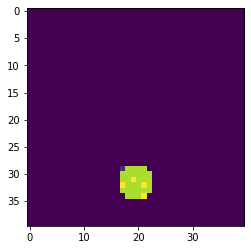

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to target thread (0x55d588c23940)

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to target thread (0x55d588c23940)

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to target thread (0x55d588c23940)

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to target thread (0x55d588c23940)

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to target thread (0x55d588c23940)

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to target thread (0x55d588c23940)

QObject::moveToThread: Current thread (0x55d588c23940) is not the object's thread (0x55d5889922e0).
Cannot move to tar

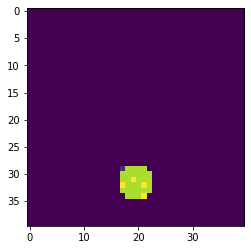

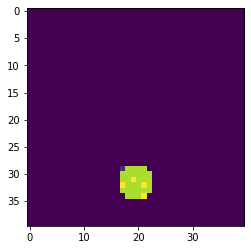

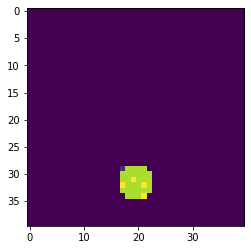

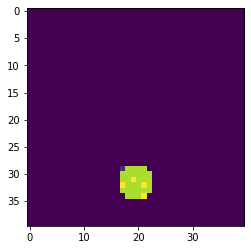

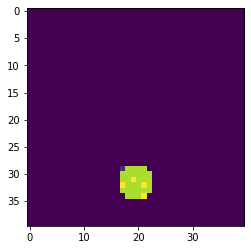

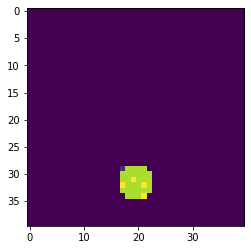

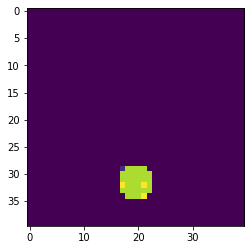

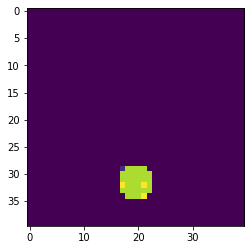

In [ ]:
make_gif('running_competition', 'df729fab57ec4fbe97ca70c073053728', '0158001')